In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# New Section

In [ ]:
# We're unzipping the cuDNN files from your Drive folder directly to the VM CUDA folders
!tar -xzvf gdrive/My\ Drive/darknet/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

# Now we check the version we already installed. Can comment this line on future runs
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.5.0
cuda/lib64/libcudnn_static.a
#define CUDNN_MAJOR 7
#define CUDNN_MINOR 5
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


In [ ]:
# Leave this code uncommented on the very first run of your notebook or if you ever need to recompile darknet again.
# Comment this code on the future runs.
!git clone https://github.com/kriyeng/darknet/
%cd darknet

# Check the folder
!ls

# I have a branch where I have done the changes commented above
!git checkout feature/google-colab

#Compile Darknet
!make

#Copies the Darknet compiled version to Google drive
!cp ./darknet /content/gdrive/My\ Drive/darknet/bin/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 10068, done.
remote: Total 10068 (delta 0), reused 0 (delta 0), pack-reused 10068
Receiving objects: 100% (10068/10068), 10.13 MiB | 3.63 MiB/s, done.
Resolving deltas: 100% (6742/6742), done.
/content/darknet
3rdparty      CMakeLists.txt	      image_yolov3.sh	     scripts
appveyor.yml  CMakeSettings.json      include		     src
build	      DarknetConfig.cmake.in  json_mjpeg_streams.sh  video_v2.sh
build.ps1     darknet.py	      LICENSE		     video_yolov3.sh
build.sh      darknet_video.py	      Makefile
cfg	      data		      net_cam_v3.sh
cmake	      image_yolov2.sh	      README.md
Branch 'feature/google-colab' set up to track remote branch 'feature/google-colab' from 'origin'.
Switched to a new branch 'feature/google-colab'
mkdir -p obj
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -W

In [ ]:
# Uncomment after the first run, when you have a copy of compiled darkent in your Google Drive

# Makes a dir for darknet and move there
#!mkdir darknet
#%cd darknet

# Copy the Darkent compiled version to the VM local drive
#!cp /content/gdrive/My\ Drive/darknet/bin/darknet ./darknet

# Set execution permissions to Darknet
#!chmod +x ./darknet

In [ ]:
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
# Not necessary cell
# Get yolov3 weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-01-24 16:13:57--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  4.96MB/s    in 43s     

2021-01-24 16:14:40 (5.55 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

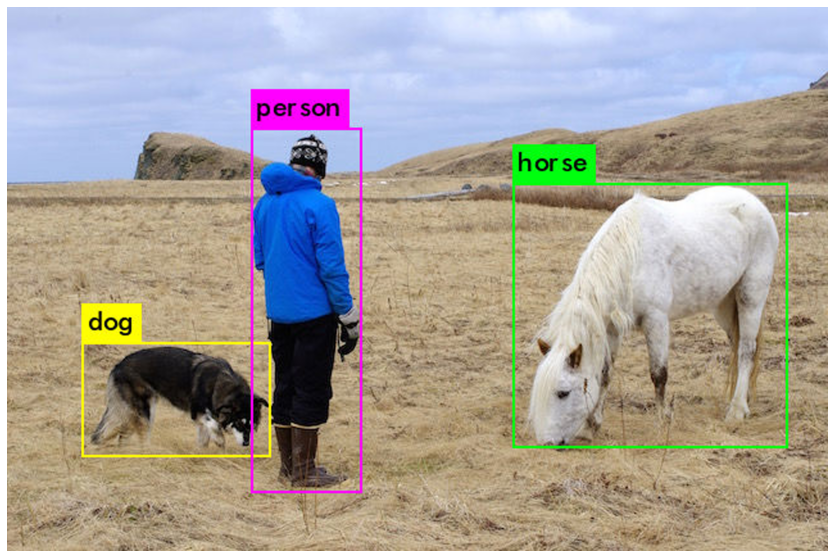

In [ ]:
# Not necessary cell
# Execute darknet using YOLOv3 model with pre-trained weights to detect objects on 'person.jpg'
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg -dont-show

# Show the result using the helper imgShow()
imShow('predictions.jpg')

In [ ]:
!cp -r "/content/gdrive/My Drive/darknet/darknet/NFPA" ./NFPA



In [ ]:
!./darknet detector train "/content/gdrive/My Drive/darknet/darknet/obj.data" "/content/gdrive/My Drive/darknet/darknet/cfg/yolov3-tiny.cfg" -dont_show  

Loaded: 0.268736 seconds

 23: 205.985535, 431.090332 avg loss, 0.000000 rate, 0.282779 seconds, 1472 images
Loaded: 0.323321 seconds

 24: 203.484894, 408.329803 avg loss, 0.000000 rate, 0.266685 seconds, 1536 images
Loaded: 0.368578 seconds

 25: 204.001862, 387.897003 avg loss, 0.000000 rate, 0.269273 seconds, 1600 images
^C


In [ ]:
# Start training at the point where the last runtime finished
#!./darknet detector train "/content/gdrive/My Drive/darknet/darknet/obj.data" "/content/gdrive/My Drive/darknet/darknet/cfg/yolov3-tiny.cfg" "/content/gdrive/My Drive/darknet/darknet/backup/yolov3-tiny_last.weights" -dont_show

layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16 0.150 BF
   1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16 0.003 BF
   2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32 0.399 BF
   3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32 0.001 BF
   4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64 0.399 BF
   5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128 0.399 BF
   7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128 0.000 BF
   8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256 0.399 BF
   9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512 0.399 BF
  11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512 0.000 

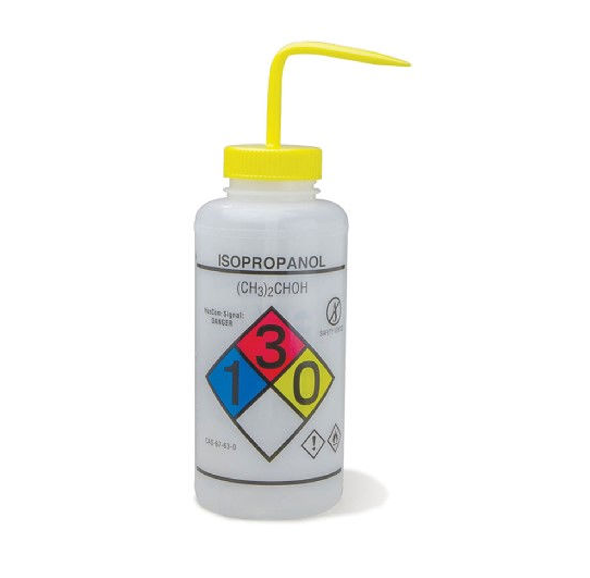

In [ ]:
!./darknet detect "/content/gdrive/My Drive/darknet/darknet/cfg/yolov3-tiny.cfg" "/content/gdrive/My Drive/darknet/darknet/backup/yolov3-tiny_last.weights" NFPA/pos-246.jpg -dont-show

# Show the result using the helper imgShow()
imShow('predictions.jpg')